# Ashrut Alok Arora - 210968206
# Week 3 code

## Importing Necessary Libraries

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers

# Q1) Understanding the Dataset and Pre-processing: Implement the following:

#### Loading the MNIST Fashion Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#### Understanding the Data

In [3]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
num_classes = len(set(y_train))
num_classes

10

In [6]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### a) Compute and display the number of classes

In [7]:
print("Number of classes = ",len(np.unique(y_train)))

Number of classes =  10


#### Plotting the first 16 Data

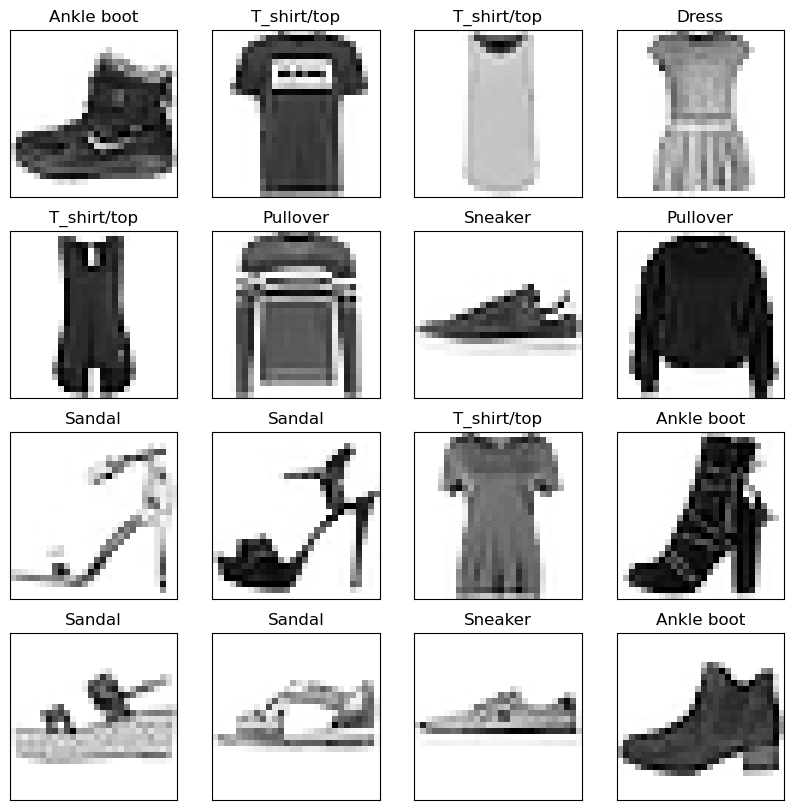

In [6]:
plt.figure(figsize=(10, 10))

for i in range(16):
    
    plt.subplot(4, 4, i + 1)

    # Xticks and Yticks are empty as we dont want any scale
    plt.xticks([])
    plt.yticks([])

    # We dont want a grid on out img
    plt.grid(False)

    # Displays the image
    plt.imshow(X_train[i].reshape((28,28)) , cmap="Greys")

    # Provides the correct label for our image
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

### b) Compute and display the dimensions of each image.

In [15]:
image_height, image_width = X_train.shape[1], X_train.shape[2]

print("Image dimensions:", image_height, "x", image_width)

Image dimensions: 28 x 28


### c) Displaying 1 image from each class

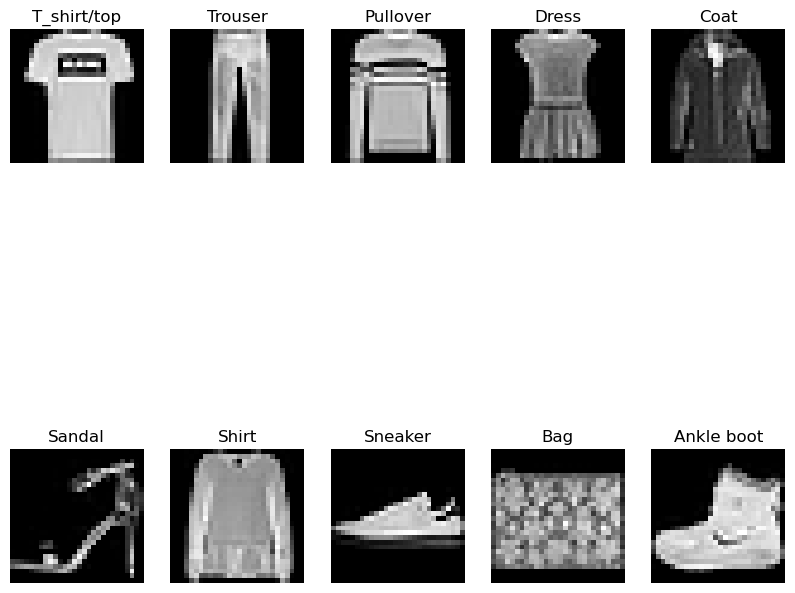

In [8]:
plt.figure(figsize=(10, 10))

for i in range(10):

    idx = np.where(y_train == i)[0][0]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.show()

### d) Normalizing the data

In [9]:
X_train = X_train/255
X_test = X_test/255

#### Splitting the data in Train and Test 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state= 224)

## FCNN Building

In [11]:
fcnn = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    
    # Fully connected layers
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    
    # Output Layer
    keras.layers.Dense(units=10, activation='softmax')
])

fcnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
fcnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = fcnn.fit(X_train, y_train, epochs=20, batch_size = 512, validation_split=0.1)

Epoch 1/20
85/85 [==============================] - 0s 2ms/step - loss: 0.7631 - accuracy: 0.7431 - val_loss: 0.4987 - val_accuracy: 0.8300
Epoch 2/20
85/85 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.8394 - val_loss: 0.4561 - val_accuracy: 0.8354
Epoch 3/20
85/85 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8542 - val_loss: 0.4389 - val_accuracy: 0.8444
Epoch 4/20
85/85 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8661 - val_loss: 0.3985 - val_accuracy: 0.8629
Epoch 5/20
85/85 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8710 - val_loss: 0.3838 - val_accuracy: 0.8652
Epoch 6/20
85/85 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8781 - val_loss: 0.3630 - val_accuracy: 0.8729
Epoch 7/20
85/85 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8809 - val_loss: 0.3600 - val_accuracy: 0.8727
Epoch 8/20
85/85 [==

In [14]:
print("Accuracy = " ,fcnn.evaluate(X_test, y_test)[1])

375/375 [==============================] - 0s 341us/step - loss: 0.3213 - accuracy: 0.8854
Accuracy =  0.8854166865348816


### Plotting the performance curves.

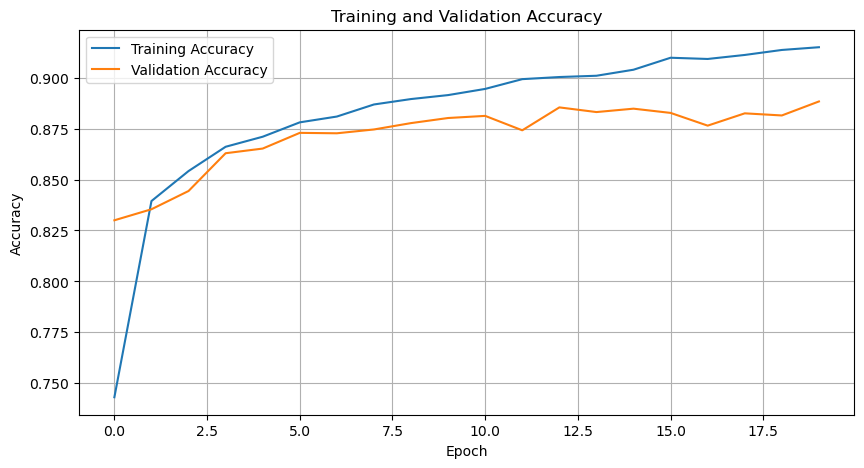

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

#### Our model is not overfitting and has good test and train accuracy

## CNN1 Model Building

In [16]:
cnn1 = keras.models.Sequential([
    
    # Convolution Layer
    keras.layers.Conv2D(filters = 32, kernel_size = 5, strides= (1,1), padding ='valid', activation ='relu', input_shape = [28,28,1]),
    
    # Max Pooling Layer
    keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2, 2)),
    
    # Flattening the Layer
    keras.layers.Flatten(),
    
    # Building Neural Network
    keras.layers.Dense(units = 100, activation = 'relu'),
    
    # Output Layer
    keras.layers.Dense(units = 10, activation = 'softmax'),
    
])

cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               460900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462742 (1.77 MB)
Trainable params: 462742 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [17]:
cnn1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history1 = cnn1.fit(X_train, y_train, epochs=20, batch_size = 512, verbose= 1, validation_split=0.1)

Epoch 1/20
85/85 [==============================] - 3s 31ms/step - loss: 0.6950 - accuracy: 0.7723 - val_loss: 0.4623 - val_accuracy: 0.8402
Epoch 2/20
85/85 [==============================] - 3s 30ms/step - loss: 0.4054 - accuracy: 0.8603 - val_loss: 0.3895 - val_accuracy: 0.8604
Epoch 3/20
85/85 [==============================] - 3s 30ms/step - loss: 0.3551 - accuracy: 0.8780 - val_loss: 0.3606 - val_accuracy: 0.8715
Epoch 4/20
85/85 [==============================] - 3s 30ms/step - loss: 0.3254 - accuracy: 0.8857 - val_loss: 0.3359 - val_accuracy: 0.8813
Epoch 5/20
85/85 [==============================] - 3s 30ms/step - loss: 0.3035 - accuracy: 0.8940 - val_loss: 0.3330 - val_accuracy: 0.8808
Epoch 6/20
85/85 [==============================] - 3s 30ms/step - loss: 0.2854 - accuracy: 0.8994 - val_loss: 0.3003 - val_accuracy: 0.8927
Epoch 7/20
85/85 [==============================] - 3s 30ms/step - loss: 0.2693 - accuracy: 0.9047 - val_loss: 0.2900 - val_accuracy: 0.8973
Epoch 8/20
85

### Testing the model

In [19]:
print("Accuracy = " ,cnn1.evaluate(X_test, y_test)[1])

375/375 [==============================] - 0s 1ms/step - loss: 0.2533 - accuracy: 0.9098
Accuracy =  0.9098333120346069


### Visualizing the Performance Curves

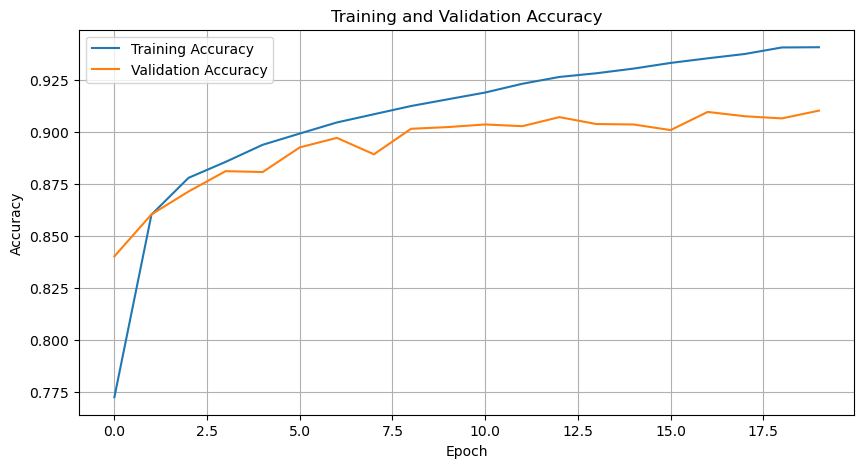

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## CNN2 Model Building

In [21]:
cnn2 = keras.models.Sequential([
    
    # Convolution Layer
    keras.layers.Conv2D(filters = 32, kernel_size = 3, strides= (1,1), padding ='valid', activation ='relu', input_shape = [28,28,1]),
    keras.layers.Conv2D(filters = 32, kernel_size = 3, strides= (1,1), padding ='valid', activation ='relu', input_shape = [28,28,1]),

    # Max Pooling Layer
    keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2, 2)),
    
    # Flattening the Layer
    keras.layers.Flatten(),
    
    # Building Neural Network
    keras.layers.Dense(units = 100, activation = 'relu'),
    
    # Output Layer
    keras.layers.Dense(units = 10, activation = 'softmax'),
    
])

cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               460900    
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                      

In [22]:
cnn2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history2 = cnn2.fit(X_train, y_train, epochs=20, batch_size = 512, verbose= 1, validation_split=0.1)

Epoch 1/20
85/85 [==============================] - 8s 91ms/step - loss: 0.6783 - accuracy: 0.7618 - val_loss: 0.4386 - val_accuracy: 0.8458
Epoch 2/20
85/85 [==============================] - 8s 90ms/step - loss: 0.4078 - accuracy: 0.8550 - val_loss: 0.3836 - val_accuracy: 0.8596
Epoch 3/20
85/85 [==============================] - 8s 92ms/step - loss: 0.3489 - accuracy: 0.8776 - val_loss: 0.3382 - val_accuracy: 0.8808
Epoch 4/20
85/85 [==============================] - 8s 92ms/step - loss: 0.3060 - accuracy: 0.8921 - val_loss: 0.3466 - val_accuracy: 0.8771
Epoch 5/20
85/85 [==============================] - 8s 93ms/step - loss: 0.2822 - accuracy: 0.8992 - val_loss: 0.2984 - val_accuracy: 0.8925
Epoch 6/20
85/85 [==============================] - 8s 94ms/step - loss: 0.2603 - accuracy: 0.9069 - val_loss: 0.2996 - val_accuracy: 0.8923
Epoch 7/20
85/85 [==============================] - 8s 94ms/step - loss: 0.2451 - accuracy: 0.9117 - val_loss: 0.2978 - val_accuracy: 0.8971
Epoch 8/20
85

### Visualizing the Performance Curves

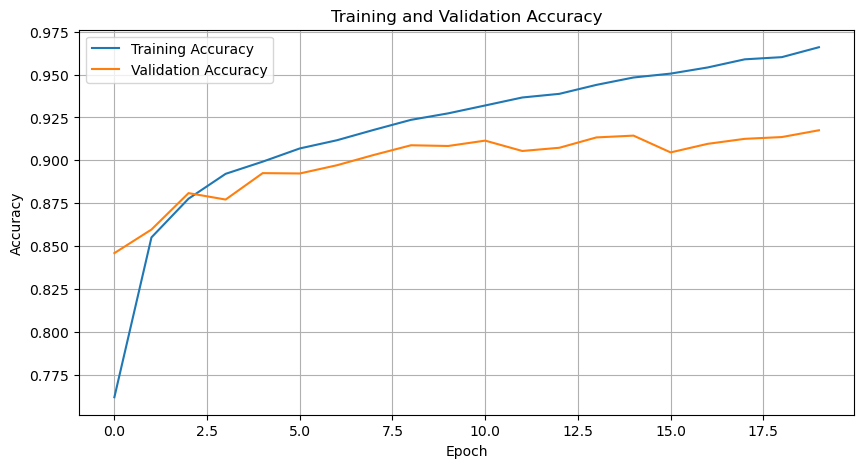

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [25]:
print("Accuracy = " ,cnn2.evaluate(X_test, y_test)[1])

375/375 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.9137
Accuracy =  0.9136666655540466


## CNN1 vs CNN2

CNN2 performs slightly better than CNN1
96% accuracy vs 94% accuracy on training set


## FCNN vs CNN


#### Number of parameters comparison
471478(CNN) vs 109386(FCNN)

#### CNN performs way better than FCNN
96% accuracy vs 91% accuracy on training set

#### CNN takes way more time for computation 
CNNs take more time for computation than normal neural networks due to their use of convolutional layers, pooling layers, and their specialization for processing high-dimensional image data with spatial relationships.
